In [1]:
import pandas as pd
import numpy as np 

from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader import DataReader

In [4]:
from datetime import datetime

In [5]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [6]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [7]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000
mean,189.439800,185.535400,187.472920,187.496121,3.442163e+07,186.461510
std,22.513191,22.408350,22.472243,22.474903,1.476147e+07,22.502048
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,142.190002
25%,173.092499,169.005001,171.105000,170.980000,2.371492e+07,169.468513
50%,187.534996,184.965004,186.320000,186.180000,3.189075e+07,185.077881
75%,209.437500,205.937496,207.340000,207.875004,4.089258e+07,206.795952
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,231.263092


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-02-05 to 2019-02-01
Data columns (total 6 columns):
High         250 non-null float64
Low          250 non-null float64
Open         250 non-null float64
Close        250 non-null float64
Volume       250 non-null float64
Adj Close    250 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


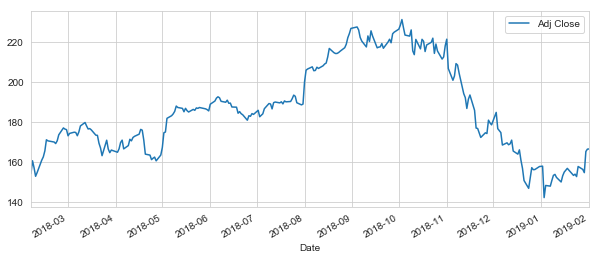

In [10]:
AAPL['Adj Close'].plot(legend=True, figsize=(10, 4))

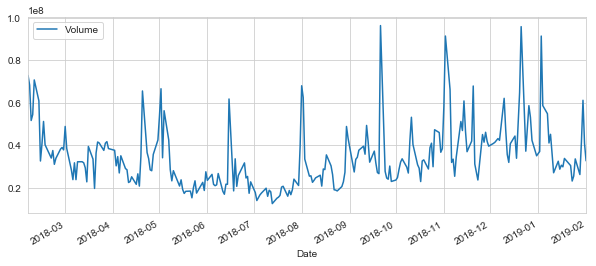

In [11]:
AAPL['Volume'].plot(legend=True, figsize=(10, 4))

In [12]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = 'MA {}'.format(ma)
#     AAPL[column_name] = pd.rolling(AAPL['Adj Close'], ma).mean()
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

In [13]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50
Date,,,,,,,,,
2018-02-05,163.880005,156.000000,159.100006,156.490005,72738500.0,154.175354,NaN,NaN,NaN
2018-02-06,163.720001,154.000000,154.830002,163.029999,68243800.0,160.618591,NaN,NaN,NaN
2018-02-07,163.399994,159.070007,163.089996,159.539993,51608600.0,157.180222,NaN,NaN,NaN
2018-02-08,161.000000,155.029999,160.289993,155.149994,54390500.0,152.855148,NaN,NaN,NaN
2018-02-09,157.889999,150.240005,157.070007,156.410004,70672600.0,154.724808,NaN,NaN,NaN


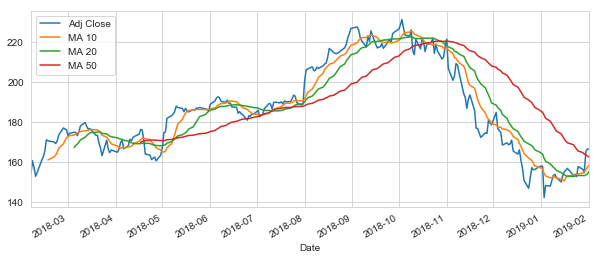

In [14]:
AAPL[['Adj Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False, figsize=(10, 4))

In [15]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [16]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,
2018-02-05,163.880005,156.000000,159.100006,156.490005,72738500.0,154.175354,NaN,NaN,NaN,NaN
2018-02-06,163.720001,154.000000,154.830002,163.029999,68243800.0,160.618591,NaN,NaN,NaN,0.041792
2018-02-07,163.399994,159.070007,163.089996,159.539993,51608600.0,157.180222,NaN,NaN,NaN,-0.021407
2018-02-08,161.000000,155.029999,160.289993,155.149994,54390500.0,152.855148,NaN,NaN,NaN,-0.027517
2018-02-09,157.889999,150.240005,157.070007,156.410004,70672600.0,154.724808,NaN,NaN,NaN,0.012232


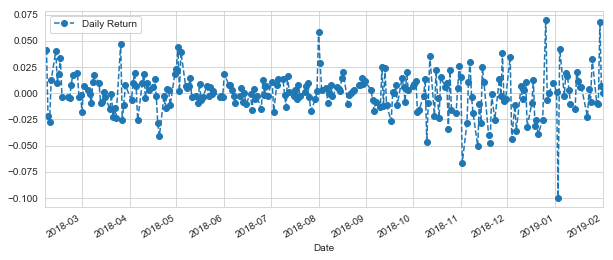

In [17]:
AAPL['Daily Return'].plot(figsize=(10 ,4), legend=True, linestyle='--', marker='o')

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


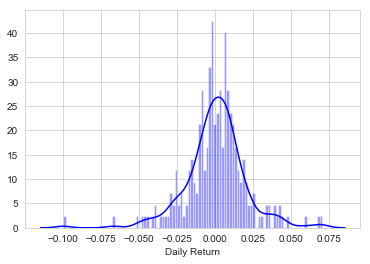

In [18]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='blue')

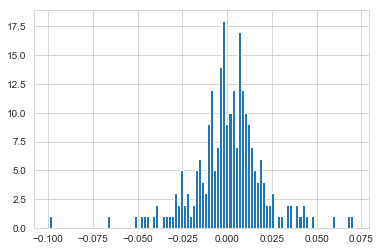

In [19]:
AAPL['Daily Return'].hist(bins=100)

In [20]:
closing_df = DataReader(['AAPL', 'GOOG', 'MSFT', 'AMZN'], 'yahoo', start, end)['Adj Close']

In [21]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-02-05,154.175354,1390.000000,1055.800049,86.502533
2018-02-06,160.618591,1442.839966,1080.599976,89.775864
2018-02-07,157.180222,1416.780029,1048.579956,88.085136
2018-02-08,152.855148,1350.500000,1001.520020,83.563408
2018-02-09,154.724808,1339.599976,1037.780029,86.679474


In [22]:
tech_rets = closing_df.pct_change()

In [23]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-02-05,NaN,NaN,NaN,NaN
2018-02-06,0.041792,0.038014,0.023489,0.037841
2018-02-07,-0.021407,-0.018062,-0.029632,-0.018833
2018-02-08,-0.027517,-0.046782,-0.044880,-0.051334
2018-02-09,0.012232,-0.008071,0.036205,0.037290


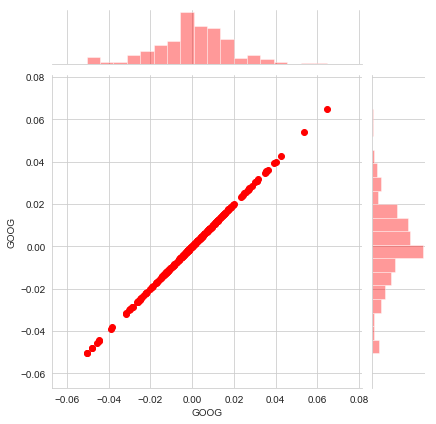

In [24]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='red')

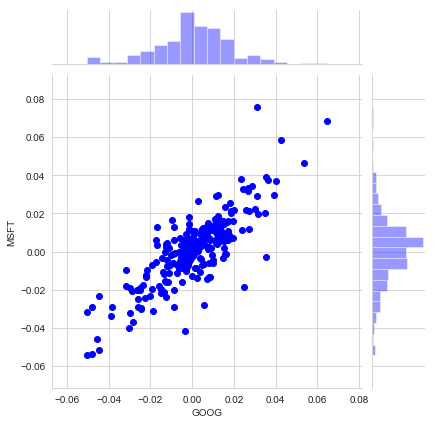

In [25]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='blue')

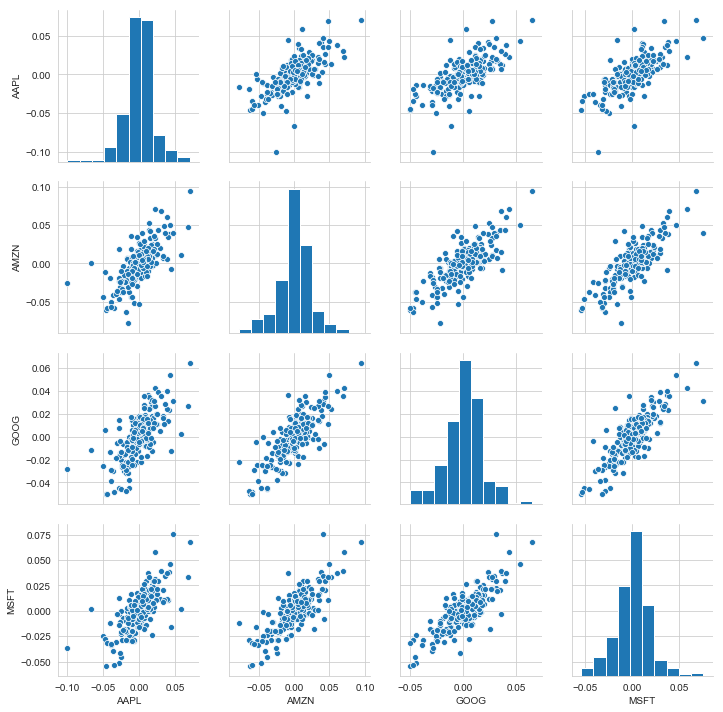

In [26]:
sns.pairplot(tech_rets.dropna())

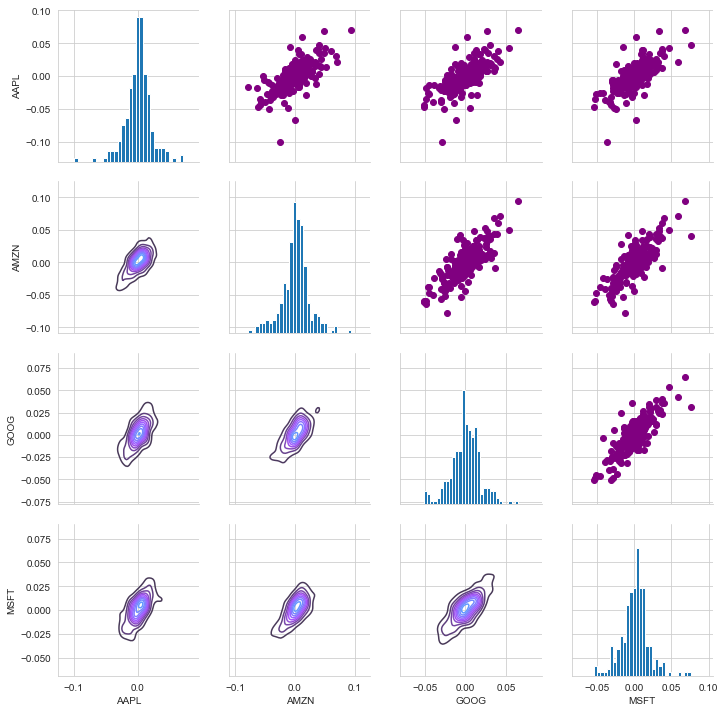

In [27]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

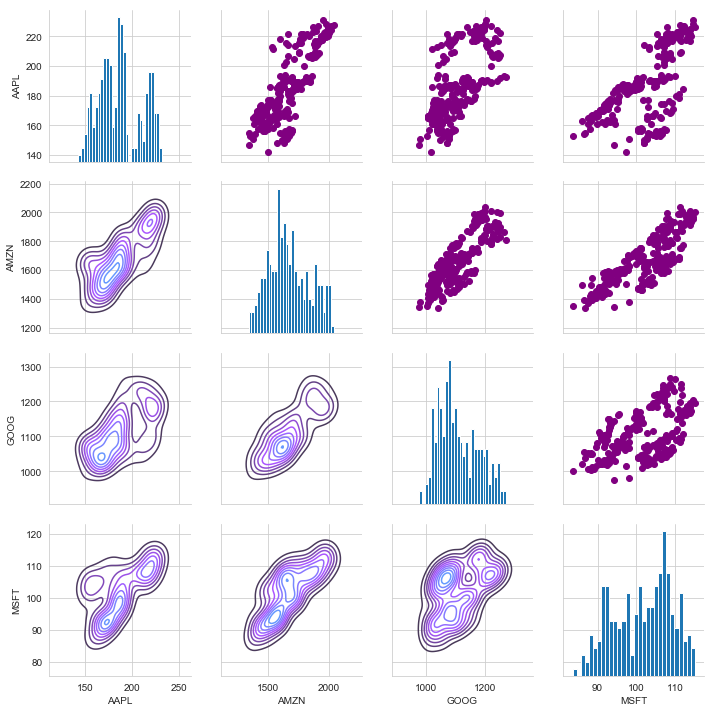

In [28]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

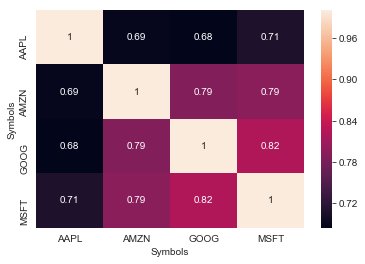

In [29]:
sns.heatmap(tech_rets.corr(), annot=True)

In [30]:
rets = tech_rets.dropna()

In [31]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-02-06,0.041792,0.038014,0.023489,0.037841
2018-02-07,-0.021407,-0.018062,-0.029632,-0.018833
2018-02-08,-0.027517,-0.046782,-0.044880,-0.051334
2018-02-09,0.012232,-0.008071,0.036205,0.037290
2018-02-12,0.040279,0.034809,0.013644,0.010773


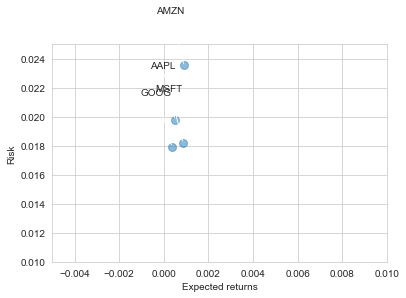

In [32]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s= np.pi*20)
plt.ylim([0.01, 0.025])
plt.xlim([-0.005, 0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(0, 50),
                 textcoords = 'offset points', ha = 'right', va='bottom',
                 arrowprops=dict(arrowstyle='-', connectionstyle='arc3'))

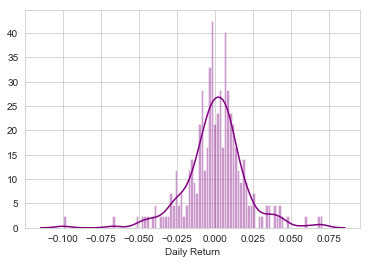

In [33]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [34]:
rets['AAPL'].quantile(0.05)

-0.030070342950868814

In [35]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [36]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [37]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-05,1110.000000,1052.030029,1090.599976,1055.800049,3798300,1055.800049
2018-02-06,1081.709961,1023.137024,1027.180054,1080.599976,3448000,1080.599976
2018-02-07,1081.780029,1048.260010,1081.540039,1048.579956,2369200,1048.579956
2018-02-08,1058.619995,1000.659973,1055.410034,1001.520020,2859100,1001.520020
2018-02-09,1043.969971,992.559998,1017.250000,1037.780029,3505900,1037.780029


Text(0.5, 1.0, 'Monte Carlo Analysis')

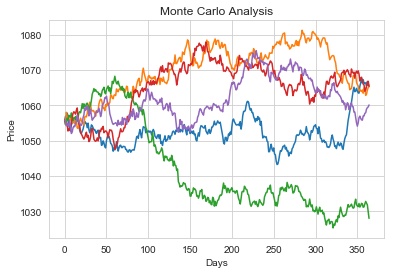

In [38]:
start_price = GOOG.iloc[0, 5]

for run in range(5):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis')

In [39]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

(array([1., 1., 1., ..., 1., 0., 1.]),
 array([ 994.52326294,  995.19219898,  995.86113502, ..., 1126.9725988 ,
        1127.64153484, 1128.31047088]),
 <a list of 200 Patch objects>)

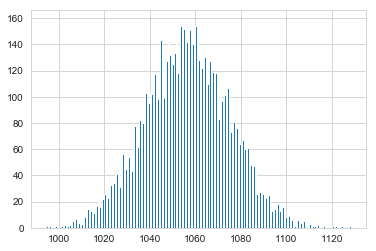

In [40]:
plt.hist(simulations, bins=200)

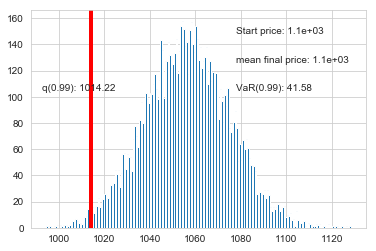

In [41]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s='Start price: {:0.2}'.format(start_price))
plt.figtext(0.6, 0.7, 'mean final price: {:0.2}'.format(simulations.mean()))
plt.figtext(0.6, 0.6, 'VaR(0.99): {:0.2f}'.format(start_price-q))
plt.figtext(0.15, 0.6, 'q(0.99): {:0.2f}'.format(q))

plt.axvline(x = q, linewidth=4, color='r')